## LOAN APPROVAL PREDICTION ANALYSIS

### BUSINESS UNDERSTANDING

#### How the loan process works?
The loan process begins with a borrower submitting an application to a lender, providing necessary documentation such as income details and credit history. The lender reviews the application, assesses the borrower's creditworthiness, and conducts underwriting to determine the risk associated with the loan. If approved, the lender offers specific loan terms, and the borrower agrees to the terms by signing a loan agreement. The closing process involves finalizing the details, and once completed, the lender disburses the funds. The borrower then repays the loan through regular installments, covering both interest and principal. The process concludes when the borrower successfully completes the repayment, and any liens or claims on collateral are released. The loan process may vary based on the type of loan and lender policies.

### OBJECTIVES

We are going to analyze a loan approval dataset that is created by Kai on Kaggle.com

#### The Goal: 
-To discover insights about how the loan has been approved.

-Improve loan approval efficiency 

-Increase approval rate for for credit worthy applicants

-Minimize risks for default


#### The Proposal: 
Use data cleaning, EDA, data visualization and statistics techniques to analyze the loan approval insights, and build a machine learning model that practices my machine learning skills.




### Data Understanding

#### About Dataset
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.
<br>

#### About columns 

* `loan_id`
* `no_of_dependents`: Number of Dependents of the Applicant
* `education`: Education of the Applicant (Graduate/Not Graduate)
* `self_employed`: Employment Status of the Applicant
* `income_annum`: Annual Income of the Applicant	
* `loan_amount`: Loan Amount
* `loan_term`: Loan Term in Years
* `cibil_score`: Credit Score	 
* `residential_assets_value`total value of residential properties owned by an individual	 
* `commercial_assets_value`	total value of commercial properties owned by individual 
* `luxury_assets_value`	total value of high end assets owned by an individual
* `bank_asset_value`total value of assets held by a bank	 
* `loan_status`: Loan Approval Status (Approved/Rejected)


In [3]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate

import warnings

warnings.filterwarnings("ignore")

In [4]:
loan_original = pd.read_csv("loan_approval_dataset.csv")
loan_original.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
loan_original.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [6]:
loan_original.shape

(4269, 13)

We already got a basic picture of this dataset, let's run some data cleaning scans as usual.

In [7]:
loan_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
#checking for missing values

def check_missing_values(loan_original):
    missing_values = loan_original.isnull().sum()
    return missing_values.to_dict()

In [9]:
missing_values = check_missing_values(loan_original)
missing_values

{'loan_id': 0,
 ' no_of_dependents': 0,
 ' education': 0,
 ' self_employed': 0,
 ' income_annum': 0,
 ' loan_amount': 0,
 ' loan_term': 0,
 ' cibil_score': 0,
 ' residential_assets_value': 0,
 ' commercial_assets_value': 0,
 ' luxury_assets_value': 0,
 ' bank_asset_value': 0,
 ' loan_status': 0}

In [10]:
# Check if there are any null values in the entire DataFrame
are_there_nulls = loan_original.isnull().any().any()
print(f"Are there any null values in the DataFrame? {are_there_nulls}")


Are there any null values in the DataFrame? False


In [11]:
loan_original.describe(include = "all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [12]:
# Assuming your DataFrame is named loan_original
categorical_columns = loan_original.select_dtypes(include='object').columns

# Display the list of categorical columns
print(categorical_columns)


Index([' education', ' self_employed', ' loan_status'], dtype='object')


In [13]:
loan_original.shape

(4269, 13)

In [15]:
loan_original.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [18]:
# Remove leading spaces from column names
loan_original.columns = loan_original.columns.str.strip()


loan_status_counts = loan_original['loan_status'].value_counts()


In [19]:
# Assuming your DataFrame is named loan_original
loan_status_counts = loan_original['loan_status'].value_counts()
loan_status_counts


 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64

In [20]:
loan_original[loan_original['loan_id'].duplicated(keep = False) == True].sort_values(['loan_id'])   

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


By the data cleaning scans, we have confirmed:
1. There is no null value and duplicated value in this dataset.
1.  `education`, `self_employed` and `loan_status` are categorical columns.
1. There are a total 4269 rows in this dataset, with 13 columns (features).
1. There are 2656 data with an approved `loan_status`, which is about 62.2% compared to the "rejected" group. The dataset is slightly imbalanced but it is acceptable and we don't need to rebalance it.
1. Other columns are numerical.

This dataset is very clean and we don't need to take any extra data cleaning steps at this moment.

Wait, not yet, I notice a small detail over the columns' names, take a look:

In [21]:
loan_original.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Except `loan_id`, all the column names contain a space in front of the text, we need to trim them up to avoid future confusions.

In [22]:
loan_original.columns = loan_original.columns.str.replace(' ', '')

In [23]:
# Check it out again

loan_original.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [24]:
# Impute NaN values for numerical features with mean
numerical_features = loan_original.select_dtypes(include=[np.number]).columns
loan_original[numerical_features] = loan_original[numerical_features].fillna(loan_original[numerical_features].mean())

# Impute NaN values for categorical features with mode
categorical_features = loan_original.select_dtypes(include=[object]).columns
loan_original[categorical_features] = loan_original[categorical_features].fillna(loan_original[categorical_features].mode().iloc[0])


In [25]:
loan_original.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [26]:
loan_original.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [27]:
loan = loan_original.drop(['loan_id'], axis=1)

In [28]:
loan.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

Now the columns' names are good.

## Analyze

Let's have an overview of each feature in this dataset.

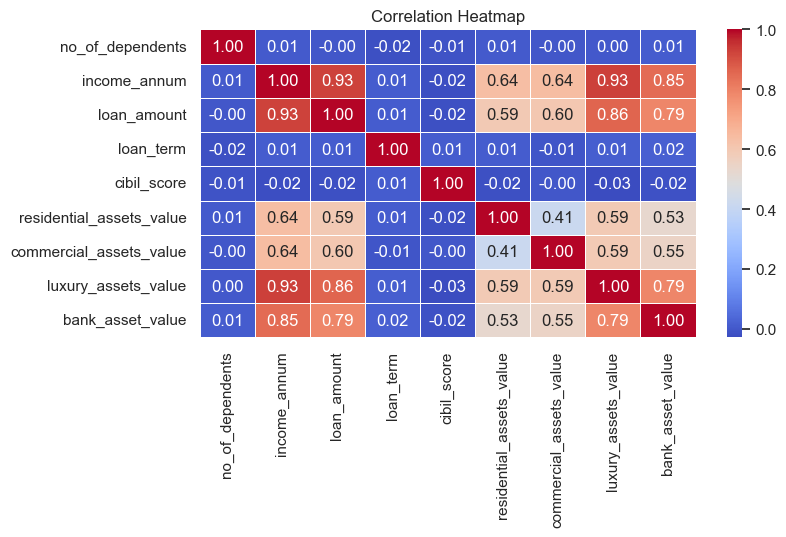

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = loan.corr()

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


As we can see, there are some variables having positive correlation with other variables, for example `loan_amount` & `income_annum`, `luxury_assets_value` & `bank_asset_value`, `income_annum` & `luxury_assets_value`. Let's start from here.

#### 1. Loan status and loan amount

Let's firstly take a look at the distribution of loan amounts.

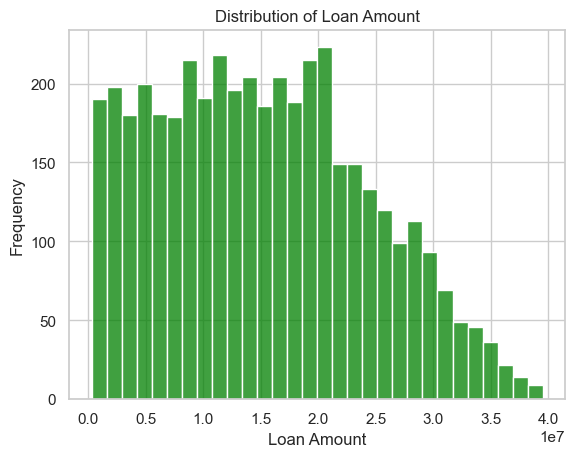

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram for the loan amount
sns.histplot(loan['loan_amount'], bins=30, kde=False, color='green')

# Set labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')

# Show the plot
plt.show()


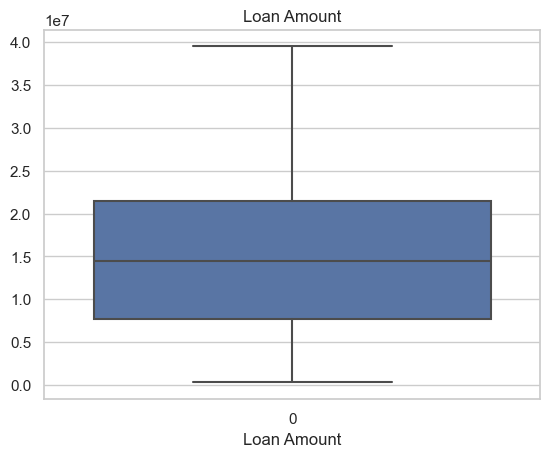

In [31]:
# no outliers?

sns.boxplot(loan['loan_amount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

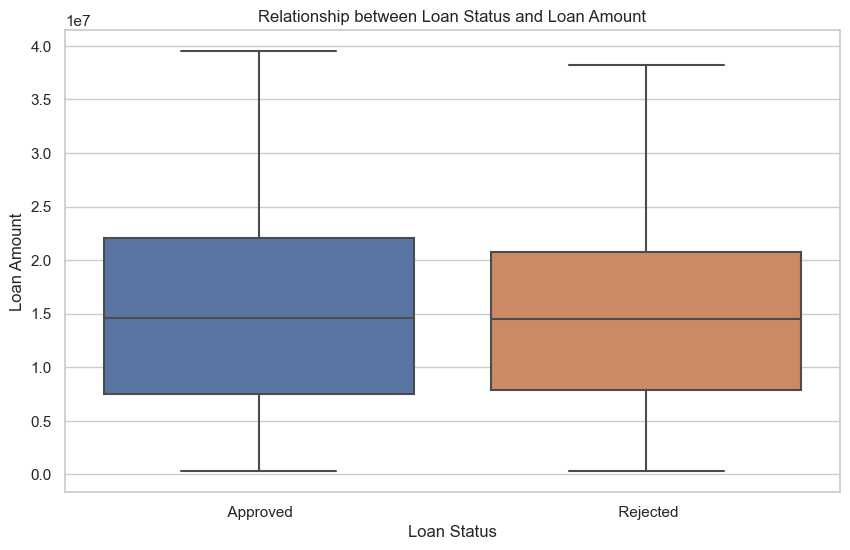

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot for the loan amount based on loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=loan)

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Relationship between Loan Status and Loan Amount')

# Show the plot
plt.show()


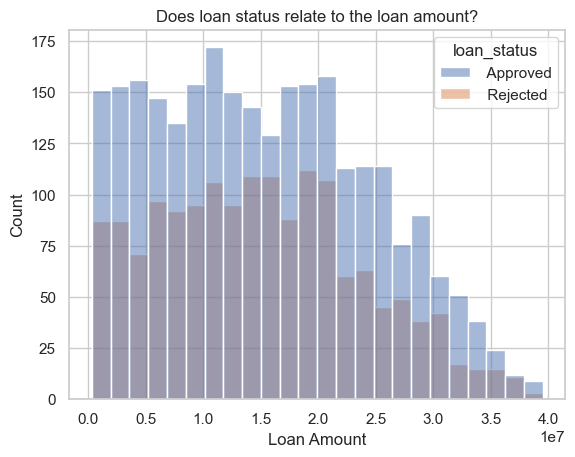

In [33]:
sns.histplot(loan, x='loan_amount', hue='loan_status')
plt.title("Does loan status relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

It is interesting to see both approved and rejected loans have the same trends based on the different loan amounts, we haven't seen a strong relationship between the loan status and the loan amount in the histogram, but how about other features? For example, annual income.

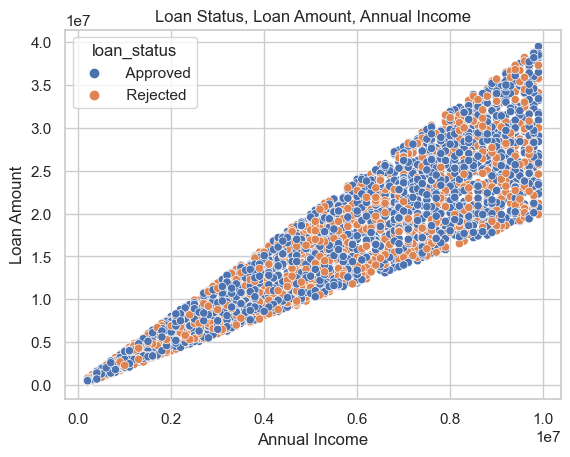

In [34]:
sns.scatterplot(x=loan['income_annum'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

There are some interesting insights we have seen over the above figure:
1. When annual income increases, the loan amount tends to increase. But the annual income doesn't show an obvious trend with the loan status.
1. In this dataset, the applicants who have the lower annual income have a narrow range in loan amounts. Vice Versa, the applicants who have the higher lower annual income have a wider range in the loan amounts. Besides that the lenders will only accept the loan amount that aligns with the annual income in order to insure the applicants have ability to pay the loan back, it is easy to imagine the applicants who have higher annual income have more flexibility on the amount of the loan, whatever for themselves or for the lenders.
1. In this dataset, the applicants who has highest annual income has been approved when they apply for the highest loan amount (see the upper right corner of the figure), but at the same time, the applicants who have the highest annual income have chances of being rejected when they apply lower loan amount (see the middle right of the figure/lower right of the triangle). It can be caused by different lenders and other conditions of the applicants. Let's use some code to take a closer look at it.

In [35]:
loan.loc[(loan['income_annum'] == loan['income_annum'].max()) & (loan['loan_status'] ==' Rejected')]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
82,2,Not Graduate,Yes,9900000,21200000,16,363,25500000,11400000,26600000,6800000,Rejected
157,5,Not Graduate,Yes,9900000,33300000,6,364,5300000,18700000,27800000,8300000,Rejected
1179,5,Graduate,No,9900000,35700000,10,392,7900000,4300000,39200000,13000000,Rejected
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1409,3,Graduate,Yes,9900000,29900000,20,490,10500000,9100000,27100000,7400000,Rejected
1547,1,Graduate,Yes,9900000,34100000,14,371,24400000,7100000,29300000,6200000,Rejected
1890,5,Graduate,No,9900000,24600000,2,530,24200000,12800000,20400000,13000000,Rejected
2862,4,Graduate,No,9900000,30000000,18,496,10400000,8000000,29300000,13800000,Rejected
2869,4,Graduate,No,9900000,26100000,2,481,14500000,5000000,23600000,9300000,Rejected
3000,1,Not Graduate,Yes,9900000,25700000,2,340,15600000,18800000,29500000,11800000,Rejected


In the previous section, we have noticed that applicants who have the highest annual income tried to apply for a lower loan amount, but were rejected by the lenders. By checking up the subset (showing above), we confirm that the loan amount is not the main reason that causes their applications to be rejected. Taking a closer look at this subset, I see their credit scores (`cibil_score`) are considered as "Poor".
<br>
According to Equifax, the standard of the credit scores are: 300-579: Poor. 580-669: Fair. 670-739: Good. 740-799: Very good.




Let's take a look at the credit score!

#### 2. Credit Score

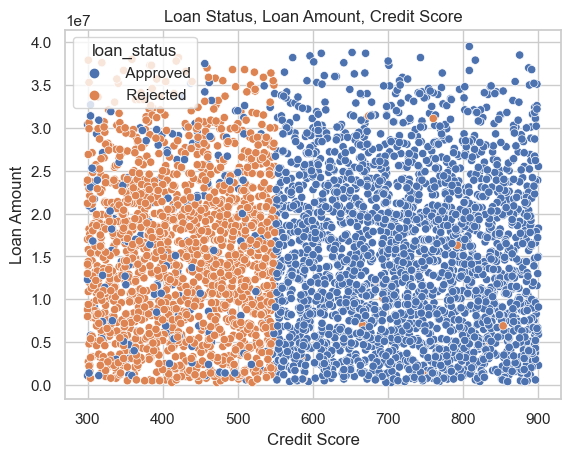

In [36]:
sns.scatterplot(x=loan['cibil_score'], y= loan['loan_amount'], hue=loan['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

I am amazed to see the credit scores around 540 - 550 separate the loan status into two parts in a very clear way. In the other words, the loan status is highly related to the credit score.
<br>
It is also interesting to see the credit score that separates the loan status is not 579 which is the highest score of the "poor" credit score. In the other words, the poor credit scores which are above 540 - 550 still have a good chance of being approved by loan lenders. This could be attributed to lenders' flexibility or specific factors that impact approval decisions.

However, we also notice a puzzling trend: some of the applicants with high credit scores (above 740) were still rejected. Few of them have only applied for a small amount of the loan which is below the median amount. What is the reason?

In [37]:
loan.loc[(loan['cibil_score'] > 740) & (loan['loan_status'] ==' Rejected')].sort_values(['cibil_score'], ascending= False)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
559,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
3527,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
911,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
3213,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
236,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
4099,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected
1446,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected


By creating the subset, we have more than 5 applicants with more than 740 credit scores, their applications were rejected.
<br>
In order to discover more reasons, there are 4 features that take my attention, they are `residential_assets_value`, `commercial_assets_value`, `luxury_assets_value`, `bank_asset_value`. Since we are not able to find the description of these 4 variables from the dataset, let's do some research and see what they are.

#### 3. residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value

* Residential Assets Value: This is likely a measure of the total value of residential properties or real estate assets owned by the individuals or organizations in the dataset.

* Commercial Assets Value: This could represent the total value of commercial properties or business-related assets owned by the individuals or organizations in the dataset. Commercial properties might include office buildings, retail spaces, warehouses, and similar assets.

* Luxury Assets Value: This might refer to the total value of high-end or luxury items owned by the individuals or organizations. These could include items such as luxury vehicles, valuable artwork, jewelry, and other premium possessions.

* Bank Asset Value: This is possibly the total value of assets held by the bank or lending institution itself. It might include cash reserves, investments, and other financial assets."

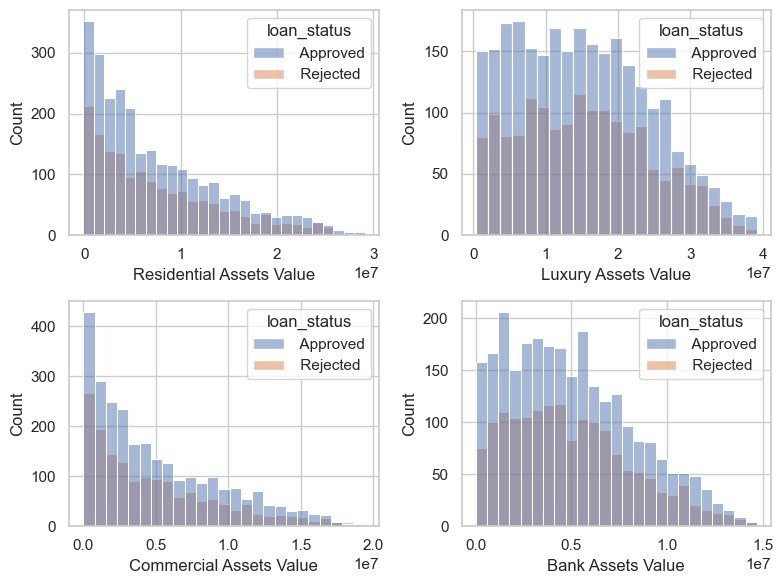

In [38]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(loan, x = 'residential_assets_value', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(loan, x = 'commercial_assets_value', hue = 'loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(loan, x = 'luxury_assets_value', hue = 'loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(loan, x = 'bank_asset_value', hue = 'loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

The same as the loan amount, we are not able to see the clear trends between those asset values and the loan status, we have to do something else and see what those asset values are.

Let's create a subset and get to know the correlation scores between those 4 asset values and other variables.

In [39]:
loan_asset = loan[['residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'loan_status']]
loan_asset_corr = loan_asset.corr()

<Axes: >

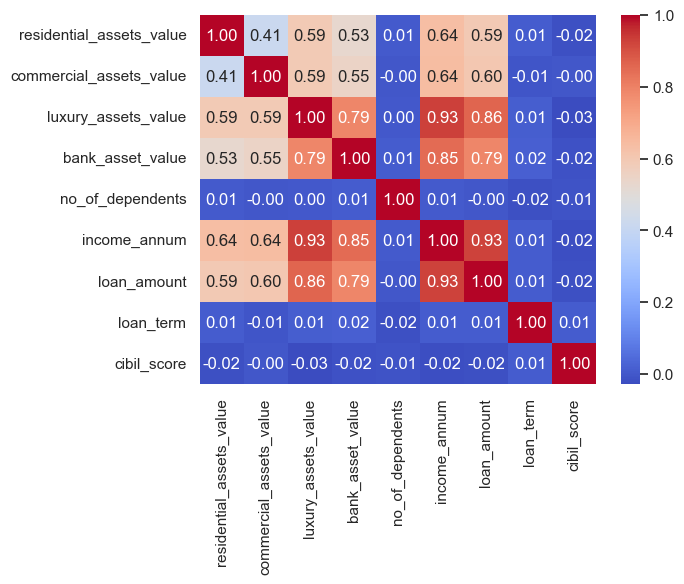

In [40]:
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="coolwarm")

Now we can see some insights through the heatmap:
1. All the asset values have moderate to strong positive linear relationships with the annual income. As the applicants who have more annual income tend to have more flexibility on purchasing the properties with higher asset values especially the luxury assets

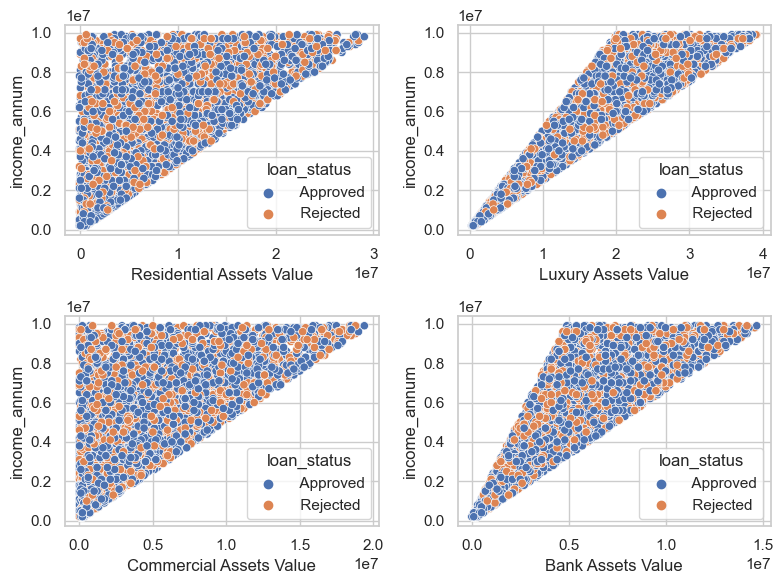

In [41]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.scatterplot(loan, x = 'residential_assets_value', y= 'income_annum', hue = 'loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")

sns.scatterplot(loan, x = 'commercial_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")

sns.scatterplot(loan, x = 'luxury_assets_value', y= 'income_annum', hue = 'loan_status',ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")

sns.scatterplot(loan, x = 'bank_asset_value', y= 'income_annum', hue = 'loan_status',ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")

plt.tight_layout()
plt.show()

Let's take a more look about the asset values through the scatterplot before we move on. 

* We can see, both of `residential_assets_value`, `commercial_assets_value` create right triangles on the scatter plots, cutting the plot into two sections. This indicates that the relationship between annual income and these asset values might have some sort of threshold effect. For example, once the asset value reaches a certain point, the annual income tends to increase significantly.


* The obtuse triangles you're seeing for `luxury_assets_value`, `bank_asset_value suggest` have a different type of relationship. The smaller triangle for luxury assets value compared to bank asset value might indicate that while there's a strong correlation between luxury assets value and annual income, there's a higher variability in annual income for any given luxury assets value. In other words, luxury assets might be a good indicator of higher annual income, but there are exceptions.

#### 4. Loan Term

On the correlation heatmap, we may already see there is no strong to moderate linear relationship between `loan_term` and other variables. But we can still discover more, it is the funnest part of a data analysis project.

In [42]:
cross_loan_term = pd.crosstab(index=loan['loan_term'], columns=loan['loan_status'])
cross_loan_term['Total'] = cross_loan_term[' Approved'] + cross_loan_term[' Rejected'] 
cross_loan_term['Approved_percentage'] = (cross_loan_term[' Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage'] = (cross_loan_term[' Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status,Approved,Rejected,Total,Approved_percentage,Rejected_percentage
loan_term,,,,,
2,315,89,404,77.970297,22.029703
4,366,81,447,81.879195,18.120805
6,282,208,490,57.551020,42.448980
8,220,166,386,56.994819,43.005181
10,229,207,436,52.522936,47.477064
12,276,180,456,60.526316,39.473684
14,239,166,405,59.012346,40.987654
16,236,176,412,57.281553,42.718447
18,257,165,422,60.900474,39.099526


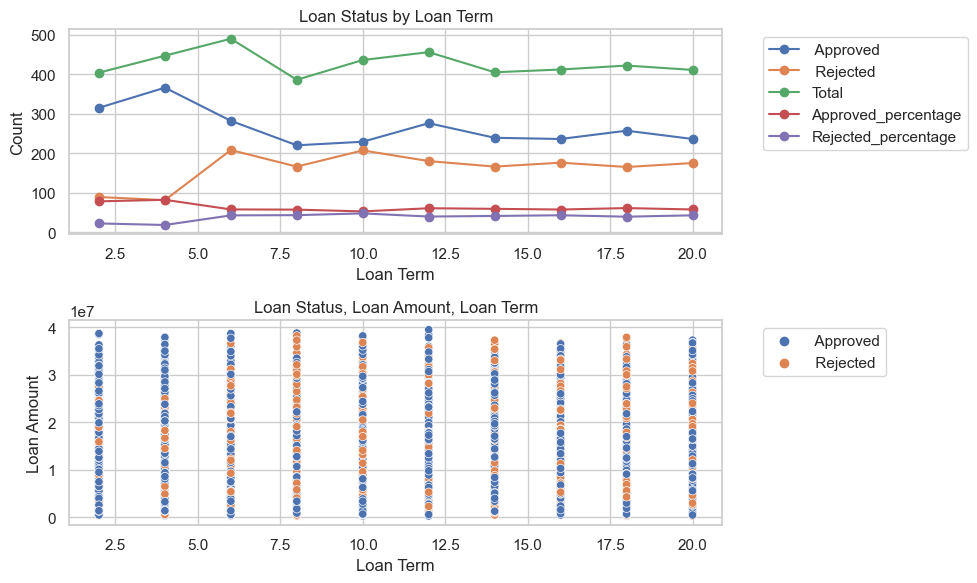

In [43]:
fig,axes = plt.subplots(2,1, figsize=(10,6))
cross_loan_term.plot(kind='line', marker='o', ax = axes[0])
axes[0].set_xlabel('Loan Term')
axes[0].set_ylabel('Count')
axes[0].set_title('Loan Status by Loan Term')
axes[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

sns.scatterplot(loan, x = 'loan_term', y = 'loan_amount', hue = 'loan_status', ax = axes[1])
axes[1].set_title("Loan Status, Loan Amount, Loan Term")
axes[1].set_xlabel("Loan Term")
axes[1].set_ylabel("Loan Amount")
axes[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.show()

1. The total observations for each of the loan terms are very even,  so we can analyze the data much easier without worrying about the balancing.
1. The shortest loan term in this dataset, which is 2 years, gets the one of the most chances for being approved by the lenders, compared to other loan terms, except the 4 years loan term which gets the most chances for being approved.
1. When the loan term is more than 4 years, the chance of being rejected have significantly increased, vice versa, the chance of being approved have dropped. Until the loan term equals to 8, both chances of being approved and rejected are tended to be normal. When the loan term reaches the 10 years, it is a loan term whose chance of being approved and rejected are approximately the same. After 10 years, the trend is becoming more consistent and the chance of being approved is slightly higher than the chance of being rejected.
1. In the group of 2 years of loan term, the applicants who apply for loans for more than \\$30,000,000 have all been approved. Similar situation as the applicants in the group of the 4 years of loan term, who apply for more than \\$30,000,000 loan amount. Compared to the higher loan amount, the lower loan amount has more chance of being rejected, especially when the applicants want the 4 years of loan term. In my experience, short term loans with lower loan amounts should be even easier to be paid back, compared to larger amounts. What are the reasons that cause those applications to be rejected? Let's use a subset to find out the reason.

In [44]:
loan.loc[(loan['loan_term'] <=4) & (loan['loan_status'] ==' Rejected')].sort_values(['loan_amount']).head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1388,4,Graduate,Yes,300000,500000,2,353,600000,100000,1200000,400000,Rejected
1061,3,Not Graduate,No,300000,500000,2,477,700000,200000,800000,400000,Rejected
3393,5,Not Graduate,No,300000,600000,4,418,500000,200000,700000,200000,Rejected
1199,2,Not Graduate,No,300000,600000,2,383,600000,300000,1100000,400000,Rejected
949,2,Graduate,Yes,300000,700000,4,411,600000,0,1200000,100000,Rejected
853,3,Not Graduate,No,300000,800000,2,458,500000,0,1100000,200000,Rejected
519,2,Graduate,Yes,500000,1300000,4,427,1400000,500000,1800000,600000,Rejected
2643,4,Graduate,No,600000,1400000,4,507,200000,300000,1700000,400000,Rejected
1012,5,Graduate,Yes,500000,1400000,4,471,500000,100000,1300000,300000,Rejected
3475,5,Not Graduate,No,700000,1400000,4,344,1500000,800000,2600000,300000,Rejected


The low credit scores should be one of the most important reasons that the applications have been rejected, another reason can be the annual income since most of the applicants in this subset (group) have the annual income lower than the median (5100000). Other than those 2 reasons, I guess the number of the dependents can also be a reason for rejection (in this subset, the number of dependents are all more than 2), especially when the applicants have lower annual income. 

Let's discover the insights of number of dependents!

#### 5. Number of dependents

Let's firstly see the distribution of this variable.

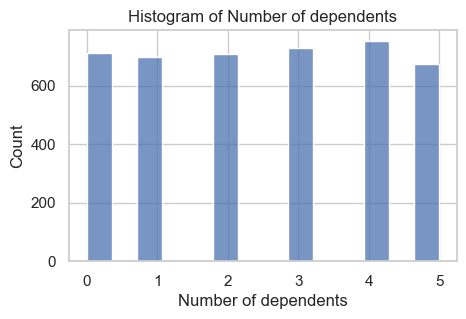

In [45]:
plt.figure(figsize = (5,3))
sns.histplot(loan['no_of_dependents'])
plt.xlabel("Number of dependents")
plt.title("Histogram of Number of dependents")

plt.show()

It is surprising to see the `no_of_dependents` can be discretized so well, it is going to be a big benefit of our analyzing process later.
<br>
Let's take a look at if the number of dependents have any relationship with the loan status by using the crosstab function.

In [46]:
cross_dependents = pd.crosstab(index=loan['no_of_dependents'], columns=loan['loan_status'])
cross_dependents['Approved_percentage'] = (cross_dependents[' Approved']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents['Rejected_percentage'] = (cross_dependents[' Rejected']/(cross_dependents[' Approved'] + cross_dependents[' Rejected'])) * 100
cross_dependents

loan_status,Approved,Rejected,Approved_percentage,Rejected_percentage
no_of_dependents,,,,
0,457,255,64.185393,35.814607
1,430,267,61.692970,38.307030
2,441,267,62.288136,37.711864
3,457,270,62.861073,37.138927
4,465,287,61.835106,38.164894
5,406,267,60.326895,39.673105


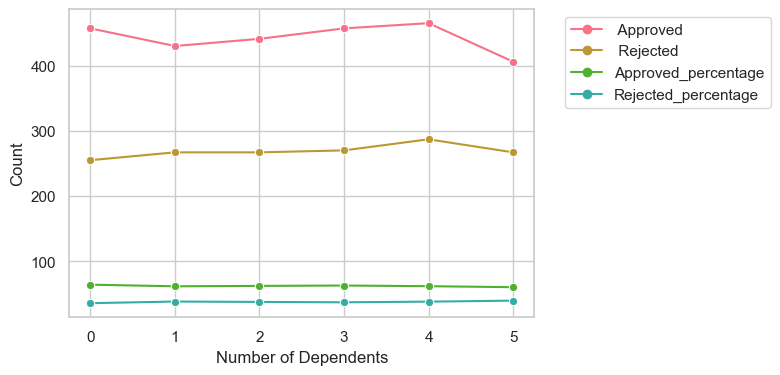

In [47]:
palette = sns.color_palette("husl")

plt.figure(figsize = (6,4))
sns.lineplot(data=cross_dependents, dashes=False, markers="o", palette=palette)
plt.ylabel("Count")
plt.xlabel("Number of Dependents")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

By checking the line chart above which presents the percentage of the applicants being approved or rejected by the number of dependents, we see 2 percentage lines are very evenly, even though we can see a wave over the "approved" line, it might be because of the total number of the applicants. So I have to reject my guess and conclude that we are not able to see an obvious trend between `no_of_dependents` and `loan_status`.

#### 6. Education

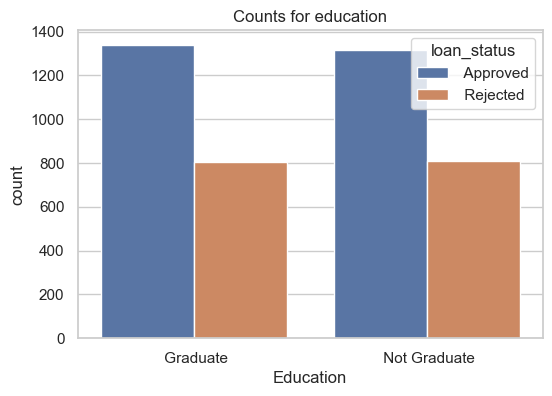

In [48]:
plt.figure(figsize = (6,4))
sns.countplot(loan, x='education', hue='loan_status')
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

The counts based on different education status are approximately the same. 
<br>
In addition, on the description page of this dataset, "`education`: Education of the Applicant (Graduate/Not Graduate)". We have to put a question mark here, if the education means high-school education or college education?
<br>
Then, we are curious about whether education affects any of the variables here.

In [49]:
education = loan.groupby(["education"], as_index=False).agg(
    count_by_education=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

education

,education,count_by_education,median_annual_income,average_loan_amount,average_credit_score,average_loan_term,avg_residential_value,avg_commerical_value,avg_luxury_value,avg_bank_value
0,Graduate,2144,5100000.0,15229151.12,599.14,10.85,7543376.87,4943610.07,15239319.03,5007182.84
1,Not Graduate,2125,5000000.0,15036894.12,600.74,10.95,7401223.53,5002964.71,15012282.35,4945929.41


By creating a sub-table, we can say there are no significant differences between the `education` and other variables in this dataset.

#### 7. Self Employed

In [50]:
self_employed = loan.groupby(["self_employed"], as_index=False).agg(
    count=("education", "count"),
    median_annual_income=("income_annum", "median"),
    average_loan_amount=("loan_amount", "mean"), 
    average_credit_score = ("cibil_score", "mean"),
    average_loan_term = ("loan_term", "mean"),
    avg_residential_value = ('residential_assets_value', "mean"),
    avg_commerical_value = ( 'commercial_assets_value', "mean"),
    avg_luxury_value = ( 'luxury_assets_value', "mean"),
    avg_bank_value = ('bank_asset_value', "mean")
    
).round(2).reset_index(drop=True)

self_employed

,self_employed,count,median_annual_income,average_loan_amount,average_credit_score,average_loan_term,avg_residential_value,avg_commerical_value,avg_luxury_value,avg_bank_value
0,No,2119,5100000.0,15120245.40,600.78,10.88,7432373.76,5052713.54,15085842.38,4977395.0
1,Yes,2150,5100000.0,15146465.12,599.10,10.92,7512279.07,4894744.19,15166186.05,4976000.0


Same thing as the `self_employed` -  there are no significant differences between the `self_employed` and other variables in this dataset.

Even though we didn't find the strong relationship between `no_of_dependent`, `education`, `self_employed` and other variables in this dataset, we are still willing to discover more by using different techniques.

## Statistical Tests

In the previous sections, we have concluded `no_of_dependents`, `education` and `self_employed` don't have a significant relationship with `loan_status` or other variables. In order to confirm it, let's run some statistical tests and see if that is true.

### Chi-square Tests

The null hypothesis for the Chi-Square test is that the two variables are independent, meaning that there's no relationship between them. If the p-value is below a chosen significance level (0.05), we would reject the null hypothesis, indicating that there is a significant association between two variables.

1. `no_of_dependents` and `loan_status`

In [51]:
contingency_dependents = pd.crosstab(loan['no_of_dependents'], loan['loan_status'])

# Perform Chi-Square test
chi2_dependents, p_dependents, dof_dependents, expected_dependents = stats.chi2_contingency(contingency_dependents)

# Print the results
print("Chi-Square Value:", chi2_dependents)
print("p-value:", p_dependents)
print("Degrees of Freedom:", dof_dependents)
print("Expected Frequencies Table:")
print(expected_dependents)


Chi-Square Value: 2.454183890937016
p-value: 0.7833787033887646
Degrees of Freedom: 5
Expected Frequencies Table:
[[442.97774654 269.02225346]
 [433.6453502  263.3546498 ]
 [440.48910752 267.51089248]
 [452.31014289 274.68985711]
 [467.8641368  284.1358632 ]
 [418.71351605 254.28648395]]


The p-value is 0.78, it indicates that there's no significant evidence to reject the null hypothesis. In other words, based on the Chi-Square test, there's no significant association between the `no_of_dependents` variable and the `loan_status` variable in the dataset.The data does not provide enough evidence to conclude that there is a meaningful relationship between the number of dependents and the loan approval status. The p-value of 0.78 suggests that any observed differences in the distribution of `no_of_dependents` between the two groups (Approved and Rejected) could very well have occurred by chance.

2. `education` and `loan_status`

In [52]:
contingency_education = pd.crosstab(loan['education'], loan['loan_status'])

chi2_education, p_education, dof_education, expected_education = stats.chi2_contingency(contingency_education)

print("Chi-Square Value:", chi2_education)
print("p-value:", p_education)
print("Degrees of Freedom:", dof_education)
print("Expected Frequencies Table:")
print(expected_education)


Chi-Square Value: 0.08395754138250573
p-value: 0.7720042291016309
Degrees of Freedom: 1
Expected Frequencies Table:
[[1333.91051769  810.08948231]
 [1322.08948231  802.91051769]]


The p-value is 0.77, it indicates that there's no significant evidence to reject the null hypothesis. In other words, based on the Chi-Square test, there's no significant association between the `education` variable and the `loan_status` variable in the dataset.The data does not provide enough evidence to conclude that there is a meaningful relationship between education and the loan approval status. The p-value of 0.77 suggests that any observed differences in the distribution of `education` between the two groups (Approved and Rejected) could very well have occurred by chance.

3. `self_employed` and `loan_status`

In [53]:
contingency_self_employed = pd.crosstab(loan['self_employed'], loan['loan_status'])

chi2_self_employed, p_self_employed, dof_self_employed, expected_self_employed = stats.chi2_contingency(contingency_self_employed)

print("Chi-Square Value:", chi2_self_employed)
print("p-value:", p_self_employed)
print("Degrees of Freedom:", dof_self_employed)
print("Expected Frequencies Table:")
print(expected_self_employed)

Chi-Square Value: 0.0
p-value: 1.0
Degrees of Freedom: 1
Expected Frequencies Table:
[[1318.35652378  800.64347622]
 [1337.64347622  812.35652378]]


The p-value is 1, it indicates that there's no significant evidence to reject the null hypothesis. In other words, based on the Chi-Square test, there's no significant association between the `self_employed` variable and the `loan_status` variable in the dataset.The data does not provide enough evidence to conclude that there is a meaningful relationship between being self employed and the loan approval status. The p-value of 1 suggests that any observed differences in the distribution of `self_employed` between the two groups (Approved and Rejected) could very well have occurred by chance.

### ANOVA

After confirming `no_of_dependents`, `education` and `self_employed` don't have a significant relationship with `loan_status`, we want to do one more test using ANOVA technique.

We'd like to perform a ANOVA test by using `loan_amount` (numerical) as dependent variable, and independent variables: `no_of_dependents` (categorical), `education`(categorical) and `self_employed`(categorical). We will see how the categorical variables `no_of_dependents`, `education`, and `self_employed` might collectively impact the `loan_amount` (numerical) in an ANOVA framework. This approach can help us understand whether there are statistically significant differences in `loan_amount` based on different combinations of these categorical factors.

In [54]:
# Create subset

ols_data = loan[['loan_amount','no_of_dependents','education','self_employed']]
ols_formula = "loan_amount ~ C(no_of_dependents) + C(education) + C(self_employed)"

In [55]:
OLS = ols(formula = ols_formula, data = ols_data)
ols_model = OLS.fit()

Let's firstly check the assumptions:

1. Linearity

Since `no_of_dependents`, `education`, and `self_employed` are all categorical variables, checking for linearity of the dependent variable (`loan_amount` in this case) is not as crucial as it would be when we're dealing with continuous independent variables. The main focus is on how the different categories of the categorical variables relate to variations in the dependent variable.

2. Normality 

In [56]:
X_ols = ols_data[['no_of_dependents','education','self_employed']]

fitted_values = ols_model.predict(X_ols)

In [57]:
residuals = ols_model.resid

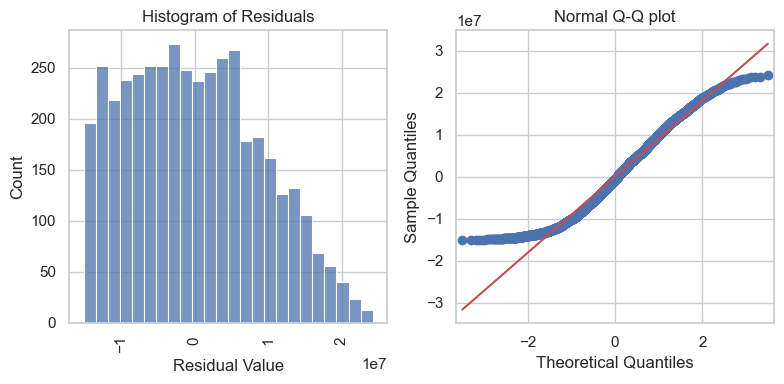

In [58]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
axes[0].tick_params(axis='x', rotation=90)

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

plt.tight_layout()

plt.show()


As we see on the left plot, the distribution of the residuals is approximately a right skewed histogram. In the Q-Q plot on the right, there is a straight diagonal line going from the bottom left to the upper right of the Q-Q plot, and the blue markers in the Q-Q plot are relatively close to the red diagonal line and not deviating significantly, it suggests that the data is approximately normally distributed. 

3. Independent observations

Combining our previous conclusions and the correlation score in the previous section, we assume all independent variables here (`no_of_dependents`, `education`, and `self_employed`) are independent from one another.

4. Homoscedasticity

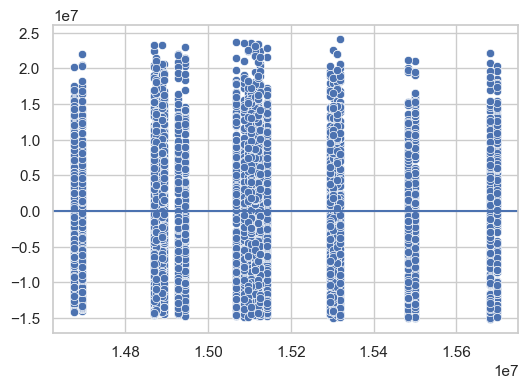

In [59]:
plt.figure(figsize = (6,4))
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)
plt.show()


The data points seem to be scattered randomly across the line where residuals equal 0, the assumption is likely met.

Now we can run the ANOVA test!

In [60]:
anova = ols(formula = ols_formula, data = ols_data).fit()

# Get the ANOVA summary
anova_summary = sm.stats.anova_lm(anova, typ = 2)

# Display the ANOVA summary
print(anova_summary)


                           sum_sq      df         F    PR(>F)
C(no_of_dependents)  2.747923e+14     5.0  0.671513  0.645062
C(education)         4.195183e+13     1.0  0.512591  0.474059
C(self_employed)     3.389126e+11     1.0  0.004141  0.948694
Residual             3.487321e+17  4261.0       NaN       NaN


* `C(no_of_dependents)`:

The p-value (0.645062) is greater than the common significance level of 0.05.
This suggests that there is no significant evidence to reject the null hypothesis, indicating that the number of dependents does not have a significant relationship with the loan amount.

* `C(education)`:

The p-value (0.474059) is also greater than 0.05.
Similar to the previous result, there's no significant evidence to suggest that education level has a significant relationship with the loan amount.

* `C(self_employed)`:

The p-value (0.948694) is way above 0.05.
Once again, there's no significant evidence to indicate that being self-employed has a significant relationship with the loan amount.
<br>
* In all three cases, the p-values are above the common threshold of 0.05, suggesting that these categorical variables are not significantly associated with the loan amount based on the ANOVA tests.

## Construct

We are now proceeding to the construct stage, which is the step for building a machine learning model. Before we start, we need to do some extra steps to make the variables ready for the following steps.

In [61]:
loan_dummies = pd.get_dummies(loan)

In [62]:
loan_dummies.rename(columns = {'education_ Graduate':'education', 'self_employed_ Yes':'self_employed', 'loan_status_ Approved':'loan_status' }, inplace = True)

In [63]:
loan_dummies = loan_dummies.drop(['education_ Not Graduate', 'self_employed_ No', 'loan_status_ Rejected'], axis=1)

In [64]:
loan_dummies.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education', 'self_employed',
       'loan_status'],
      dtype='object')

Let's check the correlation score again!

In [65]:
loan_corr = loan_dummies.corr()

<Axes: >

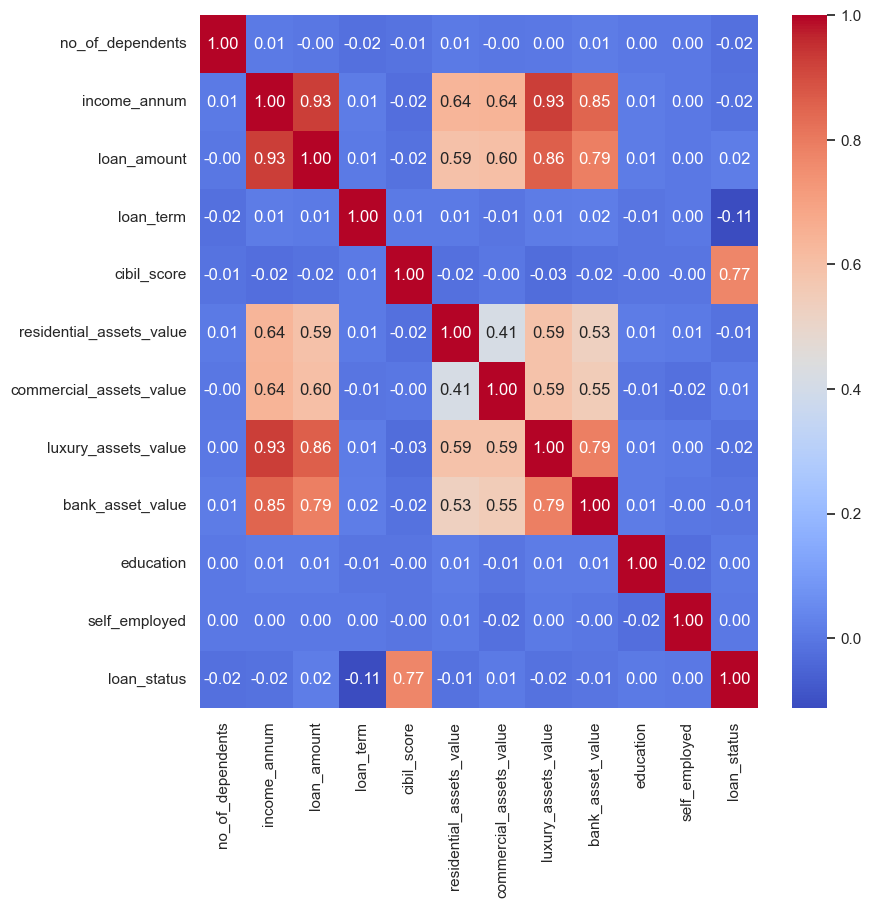

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(loan_corr, annot=True, fmt=".2f", cmap="coolwarm")

1. Over the heatmap above, we can now see the variable that affects the `loan_status` the most is `cibil_score`.
1. We also proved there is no variable that has a linear relationship with the `education` and `self_employed`.
1. As we already mentioned over previous sections, there are strong linear relationship between `income_annum` & `loan_amount`, `luxury_assets_value` & `income_annum`, `bank_asset_value` & `income_annum` and `luxury_assets_value` & `bank_asset_value`

In [68]:
y = loan_dummies['loan_status']
X = loan_dummies.drop(['loan_status'], axis =1)

In [69]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 42)

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [71]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2561, 11), (2561,), (854, 11), (854,), (854, 11), (854,))

We perfectly separate the train, validation and test sets with 60:20:20 ratio in the overall dataset.

In [72]:
stand_scaler = StandardScaler()
stand_scaler.fit(X_train)
X_train_stand = stand_scaler.transform(X_train)
X_val_stand = stand_scaler.transform(X_val)
X_test_stand = stand_scaler.transform(X_test)


In [78]:
import statsmodels.api as sm
import pandas as pd

# Separate independent variables (features or predictors) and the dependent variable
X = loan_dummies.drop('loan_status', axis=1)  # Features
y = loan_dummies['loan_status']  # Dependent variable

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     614.2
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:12:21   Log-Likelihood:                -938.20
No. Observations:                4269   AIC:                             1900.
Df Residuals:                    4257   BIC:                             1977.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

 The R-Squared is approximately 0.613, indicating that at 61.3% of the variance in the dependent variable is explained by the independent variable. The P-values of 'income_ammount', 'loan_term', 'cibil_score' and 'loan_amount' are more statistically significant as they are less than 0.05, meaning they are most likely to affect the loan approval.
 

We firstly want to try a simple one, Logistic Regression.

In [73]:
clf = LogisticRegression().fit(X_train_stand,y_train)

In [74]:
coefficients = clf.coef_[0]
intercept = clf.intercept_

variables = list(X_train.columns)

clf_summary = []
for var, coef in zip(variables, coefficients):
    clf_summary.append([var, coef])

clf_summary.append(["Intercept", intercept[0]])


print(tabulate(clf_summary, headers=["Variables", "Coefficient"], tablefmt="grid"))


+--------------------------+---------------+
| Variables                |   Coefficient |
+==========================+===============+
| no_of_dependents         |  -0.0799743   |
+--------------------------+---------------+
| income_annum             |  -1.65897     |
+--------------------------+---------------+
| loan_amount              |   1.14486     |
+--------------------------+---------------+
| loan_term                |  -0.867487    |
+--------------------------+---------------+
| cibil_score              |   4.12669     |
+--------------------------+---------------+
| residential_assets_value |   0.0588381   |
+--------------------------+---------------+
| commercial_assets_value  |   0.0409148   |
+--------------------------+---------------+
| luxury_assets_value      |   0.333257    |
+--------------------------+---------------+
| bank_asset_value         |   0.185239    |
+--------------------------+---------------+
| education                |   0.000190161 |
+---------

The logistic regression model was trained on the standardized features of the training data. The coefficients represent the change in the log-odds of the target variable for a one-unit increase in each standardized feature. The intercept term provides the baseline log-odds when all standardized features are zero. Positive coefficients indicate a positive association with the target variable, while negative coefficients indicate a negative association. The magnitude of the coefficients reflects the strength of the relationship between each feature and the log-odds of the outcome.

In [75]:
y_lr = clf.predict(X_val_stand) 

In [76]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_lr))
print('Precision:', '%.3f' % precision_score(y_val, y_lr))
print('Recall:', '%.3f' % recall_score(y_val, y_lr))
print('F1 Score:', '%.3f' % f1_score(y_val, y_lr))


Accuracy: 0.919
Precision: 0.936
Recall: 0.927
F1 Score: 0.932


The Logistic Regression model has already performed well, but we want to try a Random Forest model as well.

In [77]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_forest = random_search.best_estimator_


In [ ]:
best_params, best_forest

In [ ]:
rf_opt = RandomForestClassifier(n_estimators = 150, max_depth = None, 
                                min_samples_leaf = 1, min_samples_split = 5,random_state = 0)
rf_opt.fit(X_train, y_train)
y_rf = rf_opt.predict(X_val)

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_rf))
print('Precision:', '%.3f' % precision_score(y_val, y_rf))
print('Recall:', '%.3f' % recall_score(y_val, y_rf))
print('F1 Score:', '%.3f' % f1_score(y_val, y_rf))

In [ ]:
y_test_rf = rf_opt.predict(X_test)

print('Accuracy:', '%.3f' % accuracy_score(y_test, y_test_rf))
print('Precision:', '%.3f' % precision_score(y_test, y_test_rf))
print('Recall:', '%.3f' % recall_score(y_test, y_test_rf))
print('F1 Score:', '%.3f' % f1_score(y_test, y_test_rf))

The Random Forest model performed better performance than the Logistic Regression Model, we are going to use this one!

The scores we've obtained on the test set are remarkably similar to the validation set scores, which is a positive indication that model's performance generalizes well to new and unseen data. Here's what the scores mean:
* Accuracy: Both on the validation set and the test set, we have an accuracy of around 0.972 to 0.973. This suggests that our model is correctly classifying around 97.2% to 97.3% of instances in both datasets.

* Precision: Precision measures how many of the predicted positive instances are actually positive. With a precision of around 0.978 in both sets, it means that about 97.8% of the instances predicted as positive by our model are truly positive.

* Recall: Recall, also known as sensitivity or true positive rate, indicates how many of the actual positive instances our model is capturing. With a recall of around 0.979 in both sets, it means that our model is correctly identifying about 97.9% of the actual positive instances.

* F1 Score: The F1 score is the harmonic mean of precision and recall and provides a balanced view of a model's performance. With an F1 score of around 0.979 in both sets, it indicates that the model is achieving a balanced trade-off between precision and recall.
<br>
The fact that these metrics are very consistent between the validation and test sets is a great sign. It suggests that the model is not overfitting to the validation set and that it's likely to perform similarly well on new, unseen data.
<br>
Overall, the Random Forest model seems to have achieved a solid and robust performance on both the validation and test sets, demonstrating its capability to make accurate predictions across different datasets.

In [ ]:
cm = metrics.confusion_matrix(y_val, y_rf, labels = rf_opt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)
disp.plot()

The scores in the confusion matrix above mean:
* True negatives (upper left): The number of applications that were rejected that the model accurately predicted were rejected.
* False negatives (bottom left): The number of applications that were approved that the model inaccurately predicted were rejected.
* False positives (upper right): The number of applications that were rejected that the model inaccurately predicted were approved.
* True positives (bottom right): The number of applications that were approved that the model accurately predicted were approved.


In [ ]:
importances = rf_opt.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

# Sort the Series by importance in descending order
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_sorted.plot.bar(ax=ax)


In our analysis, we found that `cibil_score` stands out as the most important factor influencing the model's predictions. One possible reason for this prominence could be that `cibil_score` has a notable relationship with the target variable `loan_status`. However, it's important to note that correlation doesn't imply causation. While `cibil_score` plays a crucial role in the model's predictions, it's important to remember that our model identifies patterns and associations in the data. The importance of a feature doesn't necessarily mean it directly causes the predicted outcomes.In the context of our problem, `cibil_score` corresponds to credit scores. We should also consider that other factors, interactions between features, and potential noise in the data can influence these findings. Therefore, a holistic understanding of the model's behavior requires taking these aspects into account. The insights from the feature importance analysis can guide us in making informed decisions and refining our strategies. It's important to interpret these findings alongside other domain knowledge and analysis.

## Conclusion

In conclusion, this data analysis project aimed to explore the relationships between various variables in a dataset and the loan approval status. Through a comprehensive exploratory data analysis (EDA), we examined key features such as loan amount, annual income, loan term, asset values, and demographic factors.
<br>
1. Our analysis revealed several important insights:

    * Loan Amount and Annual Income: We found a strong positive correlation between loan amount and annual income. As expected, individuals with higher annual incomes were more likely to secure larger loan amounts. This underscores the importance of a borrower's financial capacity in determining loan approval.

    * Loan Term and Approval Rate: Shorter loan terms, particularly 2 and 4 years, exhibited higher approval rates compared to longer terms. This suggests that borrowers opting for shorter loan durations are perceived as lower risk by lenders.

    * Asset Values and Income: Luxury asset values and bank asset values demonstrated stronger positive correlations with annual income compared to residential and commercial asset values. This suggests that higher-income individuals are more likely to possess luxury items and maintain larger bank assets.

    * Categorical Variables: Our ANOVA tests examined the relationships between categorical variables (no_of_dependents, education, self_employed) and loan amount. While some variables showed minor effects on loan amount, none exhibited statistically significant relationships.

    * Machine Learning model: We used Random Forest model, which has ability to handle non-linearity, interactions between variables, and potential outliers, correctly predicted approximately 97% ~ 98% loan applications. This model allowed us to identify the most influential features in predicting loan approvals and made predictive performance remain reliable across various scenarios. While the model performs well, there's always room for improvement by gathering more data, refine features, and fine-tune model parameters to enhance predictive accuracy further.



1. In light of these findings, it's clear that loan approval decisions are driven by a combination of financial factors, including income, loan amount, and loan term. While certain categorical variables appeared to have limited impact on loan amount, the overall focus should remain on financial indicators.

1. It's important to note that our analysis is subject to certain limitations. The dataset may not capture all relevant factors affecting loan approval, and outliers or data inaccuracies could influence results. Additionally, causation cannot be established through correlation alone.

1. Moving forward, this analysis provides valuable insights for lenders and borrowers alike. Lenders can use these findings to refine their loan approval criteria, while borrowers can better understand the factors influencing their chances of approval.

1. Suggestion:
    * Further research could delve deeper into qualitative aspects such as loan purpose, borrower credit history, and economic conditions. Additionally, considering a wider range of features and employing advanced machine learning techniques could provide a more nuanced understanding of loan approval dynamics.


In conclusion, this analysis sheds light on the intricate relationships between various factors and loan approval outcomes. The insights gained can guide data-driven decision-making in the lending industry.